In [1]:
from scipy.stats import binom

n = 50
p = 0.03

prob_rechazo = 1 - binom.cdf(2, n, p)
print(f" Probabilidad de rechazar el lote: {prob_rechazo :.4f}")

 Probabilidad de rechazar el lote: 0.1892


In [2]:
from scipy.stats import poisson

lambd = 8

prob_colapso = 1 - poisson.cdf(10, lambd)
print(f'La probabilidad de colapso es: {prob_colapso}')

La probabilidad de colapso es: 0.18411420744145335


In [3]:
from scipy.stats import norm

mu = 120
sigma = 15

prob_incumplimiento = 1 - norm.cdf(100, loc=mu, scale=sigma)
print (f"Probabilidad de incumplimiento del contrato: {prob_incumplimiento:.4f}")

Probabilidad de incumplimiento del contrato: 0.9088


In [4]:
from scipy.stats import nbinom

# Parametros
r = 10       # Numero de exitos requeridos
p = 0.95     # Probabilidad de exito

# Probabilidad de completar 10 operaciones con maximo 2 fallas
prob_exito = nbinom.cdf(2, r, p)
print(f"Probabilidad de completar 10 operaciones con maximo 2 fallas: {prob_exito:.4f}")


Probabilidad de completar 10 operaciones con maximo 2 fallas: 0.9804


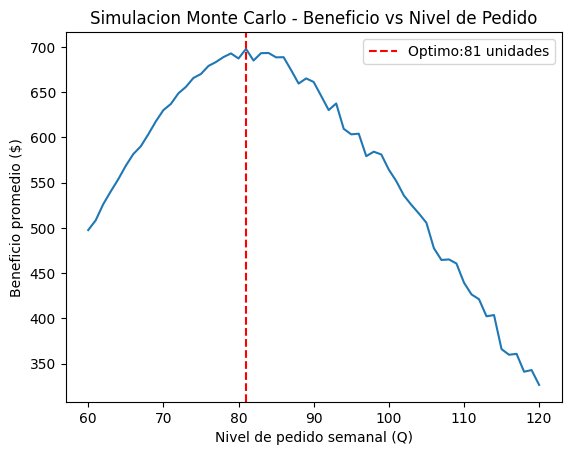

In [5]:
import numpy as np
import matplotlib.pyplot as plt

media_demanda = 80
desvio_demanda = 10
precio_venta = 20
costo_unitario = 10
costo_inventario = 2
costo_faltante = 5
semanas = 1000
np.random.seed(42)
niveles_pedido = np.arange(60,121,1)
beneficio_promedio = []

for Q in niveles_pedido :
  demanda_simulada = np.random.normal(media_demanda, desvio_demanda, semanas).round().astype(int)
  demanda_simulada = np.maximum(demanda_simulada, 0) # No hay demanda negativa
  ventas = np.minimum(Q, demanda_simulada)
  stock_sobrante = np.maximum(Q - demanda_simulada, 0)
  faltantes = np.maximum(demanda_simulada - Q, 0)
  beneficio = (ventas * precio_venta) - (Q * costo_unitario) - (stock_sobrante * costo_inventario) - (faltantes * costo_faltante)
  beneficio_promedio.append(np.mean(beneficio))

plt.plot(niveles_pedido, beneficio_promedio)
plt.xlabel('Nivel de pedido semanal (Q)')
plt.ylabel('Beneficio promedio ($)')
plt.title('Simulacion Monte Carlo - Beneficio vs Nivel de Pedido')
plt.axvline(niveles_pedido[np.argmax(beneficio_promedio)], color ='r',
linestyle ='--', label =f'Optimo:{niveles_pedido[np.argmax(beneficio_promedio)]} unidades')
plt.legend()